# Splice type detection using Convolutional Neural Network

In [80]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [20,15]

In [2]:
fname = '../rawdata/splice.data'
with open(fname) as f:
    content = f.readlines()
content = [x.strip().split(',') for x in content]

In [4]:
for l in content:
    for i in range(len(l)):
        l[i]=l[i].strip()
raw_data = np.array(content)

In [19]:
raw_data.shape

(3190, 3)

In [68]:
raw_data[0:5]

array([['EI', 'ATRINS-DONOR-521',
        'CCAGCTGCATCACAGGAGGCCAGCGAGCAGGTCTGTTCCAAGGGCCTTCGAGCCAGTCTG'],
       ['EI', 'ATRINS-DONOR-905',
        'AGACCCGCCGGGAGGCGGAGGACCTGCAGGGTGAGCCCCACCGCCCCTCCGTGCCCCCGC'],
       ['EI', 'BABAPOE-DONOR-30',
        'GAGGTGAAGGACGTCCTTCCCCAGGAGCCGGTGAGAAGCGCAGTCGGGGGCACGGGGATG'],
       ['EI', 'BABAPOE-DONOR-867',
        'GGGCTGCGTTGCTGGTCACATTCCTGGCAGGTATGGGGCGGGGCTTGCTCGGTTTTCCCC'],
       ['EI', 'BABAPOE-DONOR-2817',
        'GCTCAGCCCCCAGGTCACCCAGGAACTGACGTGAGTGTCCCCATCCCGGCCCTTGACCCT']],
      dtype='<U60')

In [54]:
def getInstanceFromRow(row):
    onehot = np.zeros((1,3))
    label = row[0]
    if label == 'EI':
        onehot[0][0] = 1
    elif label == 'IE':
        onehot[0][1] = 1
    else:
        onehot[0][2] = 1
    orth = np.zeros((len(row[2]),4))
    for i in range(len(row[2])):
        c = row[2][i]
        if c == 'A':
            orth[i][0] = 1
        elif c == 'C':
            orth[i][1] = 1
        elif c == 'G':
            orth[i][2] = 1
        elif c == 'T':
            orth[i][3] = 1
    return orth, onehot

In [55]:
x = []
y = []
for i in range(raw_data.shape[0]):
    xi,yi=getInstanceFromRow(raw_data[i])
    x.append(xi)
    y.append(yi)
x = np.array(x)
y = np.array(y)

In [56]:
shuffle_indices = np.random.permutation(len(x))
x = x[shuffle_indices]
y = y[shuffle_indices]

In [57]:
x.shape

(3190, 60, 4)

In [58]:
x = np.swapaxes(x,1,2)
x.shape

(3190, 4, 60)

In [64]:
y.shape

(3190, 1, 3)

In [65]:
y[0]

array([[0., 0., 1.]])

In [59]:
x[0]

array([[0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
        1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
        0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
        1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
        0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
        0., 0., 1., 0., 0., 0., 0., 1

In [60]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv1D, Dropout, MaxPooling1D
from keras import backend as K
K.set_learning_phase(True)

In [61]:
model = Sequential()
model.add(Conv1D(8, 3, input_shape=(None, 60), padding='same', name='conv1'))
model.add(Activation('relu'))
model.add(MaxPooling1D())
model.add(Conv1D(16, 3, padding='same', name='conv2'))
model.add(Activation('relu'))
model.add(MaxPooling1D())
model.add(Dense(3, name='fc1'))
model.add(Dropout(0.5))
model.add(Activation('softmax'))

In [62]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [63]:
model.fit(x, y, epochs=30, batch_size=32, validation_split=0.1, shuffle=True)
K.set_learning_phase(False)

Train on 2871 samples, validate on 319 samples
Epoch 1/30
2871/2871 [==============================] - 3s 939us/step - loss: 1.0702 - acc: 0.3870 - val_loss: 1.0381 - val_acc: 0.4013
Epoch 2/30
2871/2871 [==============================] - 1s 179us/step - loss: 0.9692 - acc: 0.4587 - val_loss: 0.9200 - val_acc: 0.4922
Epoch 3/30
2871/2871 [==============================] - 1s 407us/step - loss: 0.7971 - acc: 0.5705 - val_loss: 0.7069 - val_acc: 0.6426
Epoch 4/30
2871/2871 [==============================] - 1s 375us/step - loss: 0.6375 - acc: 0.6468 - val_loss: 0.6012 - val_acc: 0.6677
Epoch 5/30
2871/2871 [==============================] - 1s 305us/step - loss: 0.5327 - acc: 0.6855 - val_loss: 0.5060 - val_acc: 0.6991
Epoch 6/30
2871/2871 [==============================] - 1s 302us/step - loss: 0.4832 - acc: 0.6987 - val_loss: 0.5100 - val_acc: 0.6897
Epoch 7/30
2871/2871 [==============================] - 1s 332us/step - loss: 0.4533 - acc: 0.6991 - val_loss: 0.4625 - val_acc: 0.7053
E

# Splice junction detection using NLP and NB

In [66]:
raw_data.shape

(3190, 3)

In [71]:
df = pd.DataFrame(data=raw_data,columns=['class','name','sequence'])
df.head()

,class,name,sequence
0,EI,ATRINS-DONOR-521,CCAGCTGCATCACAGGAGGCCAGCGAGCAGGTCTGTTCCAAGGGCC...
1,EI,ATRINS-DONOR-905,AGACCCGCCGGGAGGCGGAGGACCTGCAGGGTGAGCCCCACCGCCC...
2,EI,BABAPOE-DONOR-30,GAGGTGAAGGACGTCCTTCCCCAGGAGCCGGTGAGAAGCGCAGTCG...
3,EI,BABAPOE-DONOR-867,GGGCTGCGTTGCTGGTCACATTCCTGGCAGGTATGGGGCGGGGCTT...
4,EI,BABAPOE-DONOR-2817,GCTCAGCCCCCAGGTCACCCAGGAACTGACGTGAGTGTCCCCATCC...


In [72]:
def getKmers(sequence,size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence)-size+1)]
df['hexamers'] = df.apply(lambda x: getKmers(x['sequence']),axis=1)
df.head()

,class,name,sequence,hexamers
0,EI,ATRINS-DONOR-521,CCAGCTGCATCACAGGAGGCCAGCGAGCAGGTCTGTTCCAAGGGCC...,"[ccagct, cagctg, agctgc, gctgca, ctgcat, tgcat..."
1,EI,ATRINS-DONOR-905,AGACCCGCCGGGAGGCGGAGGACCTGCAGGGTGAGCCCCACCGCCC...,"[agaccc, gacccg, acccgc, cccgcc, ccgccg, cgccg..."
2,EI,BABAPOE-DONOR-30,GAGGTGAAGGACGTCCTTCCCCAGGAGCCGGTGAGAAGCGCAGTCG...,"[gaggtg, aggtga, ggtgaa, gtgaag, tgaagg, gaagg..."
3,EI,BABAPOE-DONOR-867,GGGCTGCGTTGCTGGTCACATTCCTGGCAGGTATGGGGCGGGGCTT...,"[gggctg, ggctgc, gctgcg, ctgcgt, tgcgtt, gcgtt..."
4,EI,BABAPOE-DONOR-2817,GCTCAGCCCCCAGGTCACCCAGGAACTGACGTGAGTGTCCCCATCC...,"[gctcag, ctcagc, tcagcc, cagccc, agcccc, gcccc..."


In [73]:
dna_texts = list(df['hexamers'])
for i in range(len(dna_texts)):
    dna_texts[i] = ' '.join(dna_texts[i])
y = df.iloc[:,0].values

In [77]:
dna_texts[0]

'ccagct cagctg agctgc gctgca ctgcat tgcatc gcatca catcac atcaca tcacag cacagg acagga caggag aggagg ggaggc gaggcc aggcca ggccag gccagc ccagcg cagcga agcgag gcgagc cgagca gagcag agcagg gcaggt caggtc aggtct ggtctg gtctgt tctgtt ctgttc tgttcc gttcca ttccaa tccaag ccaagg caaggg aagggc agggcc gggcct ggcctt gccttc ccttcg cttcga ttcgag tcgagc cgagcc gagcca agccag gccagt ccagtc cagtct agtctg'

In [78]:
# Create Bag of words model using CountVectoriser()
# Explore on optimal choice for n-gram. For now, i'm choosing n-gram = 4
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(dna_texts)
X.shape

(3190, 92874)

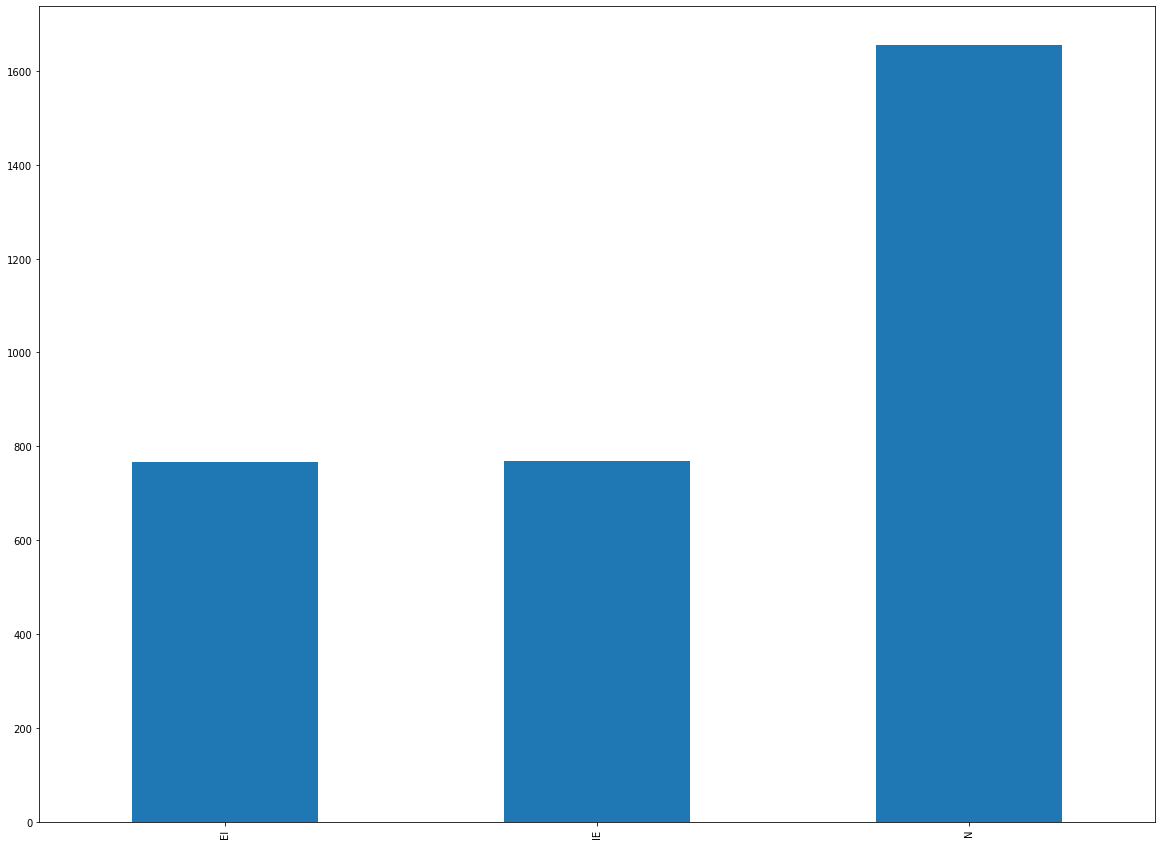

In [81]:
df['class'].value_counts().sort_index().plot.bar();

In [85]:
#Performing Classification on the created bag of words data

#test train splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#modelling
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB(alpha=0.1)
clf.fit(X_train,y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [86]:
y_pred = clf.predict(X_test)

In [90]:
#Performance/accuracy testing
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
print("Confusion metrics\n")
print(pd.crosstab(pd.Series(y_test,name='Actual'),pd.Series(y_pred,name='Predicted')))
def get_metrics(y_test,y_pred):
    accuracy = accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred,average='weighted')
    precision = precision_score(y_test,y_pred,average='weighted')
    recall = recall_score(y_test,y_pred,average='weighted')
    return accuracy, f1, precision, recall
accuracy, f1, precision, recall = get_metrics(y_test,y_pred)
print("accuracy = %.3f \nf1 = %.3f \nprecision=%.3f \nrecall=%.3f" %(accuracy,f1,precision,recall))

Confusion metrics

Predicted   EI   IE   N
Actual                 
EI         145   22  12
IE          16  111  13
N          118  119  82
accuracy = 0.530 
f1 = 0.494 
precision=0.626 
recall=0.530
